In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import scipy.spatial.distance


plt.set_cmap('gray')

# load dataset

In [2]:
train = tf.keras.datasets.mnist.load_data()[0]
X_train, Y_train = train[0], train[1]

test = tf.keras.datasets.mnist.load_data()[1]
X_test, Y_test = test[0], test[1]

n_train = X_train.shape[0]
n_test = X_test.shape[0]

m = X_train.shape[1]**2

In [3]:
X_train = X_train.reshape([n_train, m])
X_test = X_test.reshape([n_test, m])

# take subsamples

In [4]:
idx = np.random.randint(n_train, size=1000)
x_train_sample = X_train[idx]
y_train_sample = Y_train[idx]

In [5]:
idx = np.random.randint(n_test, size=10)
x_test_sample = X_test[idx]
y_test_sample = Y_test[idx]

# calculate distances

In [6]:
k = 3

dists = scipy.spatial.distance.cdist(x_train_sample, x_test_sample, metric='euclid')
idx_nearest = np.argpartition(dists, k, axis=0)[:k]
nearest_dists = np.take(x_train_sample, idx)

In [7]:
idx_nearest.shape

(3, 10)

In [8]:
idx_nearest

array([[490, 440, 886, 370, 375, 554, 415, 168, 894, 643],
       [296, 684,  27,  15, 418, 920, 107, 550,  17, 787],
       [613, 493, 387, 368, 551, 225,   2, 521, 865, 483]])

# explore

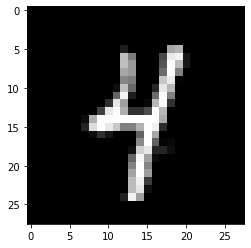

In [9]:
index = 3
test_sample = x_test_sample[index].reshape([28, 28])
_ = plt.imshow(test_sample)

In [10]:
train_idx = idx_nearest[:, index]
a, b, c = train_idx

y_train_sample[train_idx]

array([4, 4, 1], dtype=uint8)

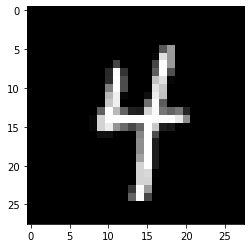

In [11]:
train_sample = x_train_sample[a].reshape([28, 28])
_ = plt.imshow(train_sample)

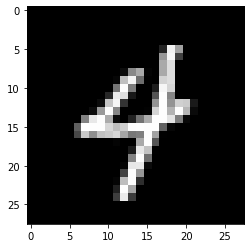

In [12]:
train_sample = x_train_sample[b].reshape([28, 28])
_ = plt.imshow(train_sample)

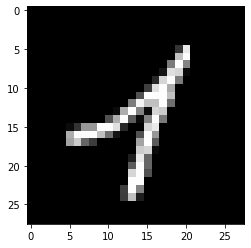

In [13]:
train_sample = x_train_sample[c].reshape([28, 28])
_ = plt.imshow(train_sample)